In [1]:
import h5py
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import verdict

# Parameters

In [4]:
sample_i = 0

In [5]:
modeling_group = 'sameer_charlton'

# Analysis

## Load Data

In [6]:
observers_data = verdict.Dict.from_hdf5( './data/synthetic_data/sample{}/observers_file.h5'.format( sample_i ) )

In [7]:
actual = verdict.Dict.from_hdf5( './data/synthetic_data/sample{}/theorists_file.h5'.format( sample_i ) )

In [8]:
provided = verdict.Dict.from_hdf5( './data/synthetic_data_samples/sample0.h5' )

In [9]:
modeled_raw = verdict.Dict.from_hdf5( './data/modeling_results/{}/sample{}.hdf5'.format( modeling_group, sample_i ) )

In [10]:
modeled = {
    'metallicity': np.array([ modeled_raw[str(i+1)][0] for i in range( actual['metallicity'].size ) ]),
    'emetallicity': np.array([ modeled_raw[str(i+1)][1] for i in range( actual['metallicity'].size ) ]),
}

### Address Possible Scrambling of Sightline Inds

#### Best case match closest metallicities

In [11]:
model_sort_inds = np.argsort( modeled['metallicity'] )
actual_sort_inds = np.argsort( actual['metallicity'] )

#### Use Sameer's columns to assess mixup

In [12]:
columns = pd.read_csv( './data/modeling_results/sameer_charlton/columns.txt', sep='\t', index_col=0 )

In [13]:
columns.loc['HI']

1     (16.119, 0.024)
2      (16.79, 0.036)
3     (16.228, 0.119)
4     (16.116, 0.021)
5     (15.042, 0.083)
6     (15.847, 0.085)
7     (16.152, 0.112)
8     (16.002, 0.016)
9     (15.083, 0.036)
10    (15.246, 0.019)
Name: HI, dtype: object

In [14]:
provided['H I']['logN']

array([16.119, 16.79 , 16.228, 16.116, 15.042, 15.847, 16.152, 16.002,
       15.083, 15.246])

In [15]:
np.log10( actual['H I'] )

array([16.11584568, 16.78074119, 16.30781422, 16.11727303, 15.02511568,
       15.77885151, 16.04175715, 15.98874601, 15.11761043, 15.23535708])

It doesn't look like there was a mixup...

# Results

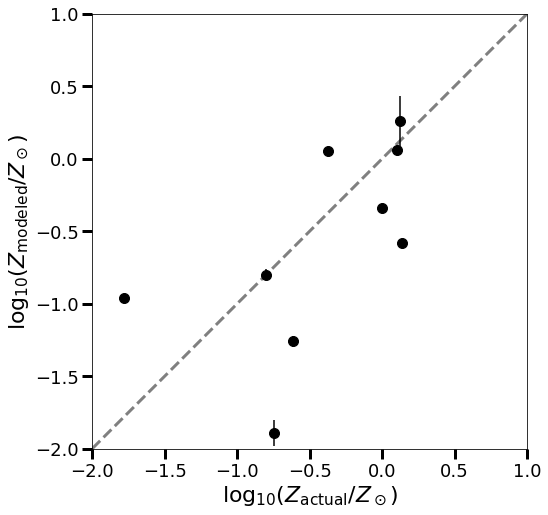

In [16]:
fig = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

ax.errorbar(
    np.log10( actual['metallicity'] ),
    modeled['metallicity'],
    yerr = modeled['emetallicity'],
    marker = 'o',
    markersize = 10,
    color = 'k',
    linestyle = 'none',
)

# ax.errorbar(
#     np.log10( actual['metallicity'] )[actual_sort_inds],
#     modeled['metallicity'][model_sort_inds],
#     yerr = modeled['emetallicity'][model_sort_inds],
#     marker = 'o',
#     markersize = 10,
#     color = '0.5',
#     linestyle = 'none',
#     zorder = -5,
# )

ax.plot(
    [ -2, 1 ],
    [ -2, 1 ],
    color = '0.5',
    linestyle = '--',
    linewidth = 3,
    zorder = -10,
)

ax.tick_params( length=10, width=3, labelsize=18 )

ax.set_xlabel( r'$\log_{10}( Z_{\rm actual}/Z_\odot )$', fontsize=22, )
ax.set_ylabel( r'$\log_{10}( Z_{\rm modeled}/Z_\odot )$', fontsize=22, )

ax.set_xlim( -2, 1 )
ax.set_ylim( -2, 1 )

ax.set_aspect( 'equal' )

## Possible Origins of Error

### Mismatch Between Provided and Actual

In [17]:
ions = list( provided.keys() )

<ipython-input-18-fcc810237c2b>:5: RuntimeWarning: divide by zero encountered in log10
  xs = np.log10( actual[ion] )


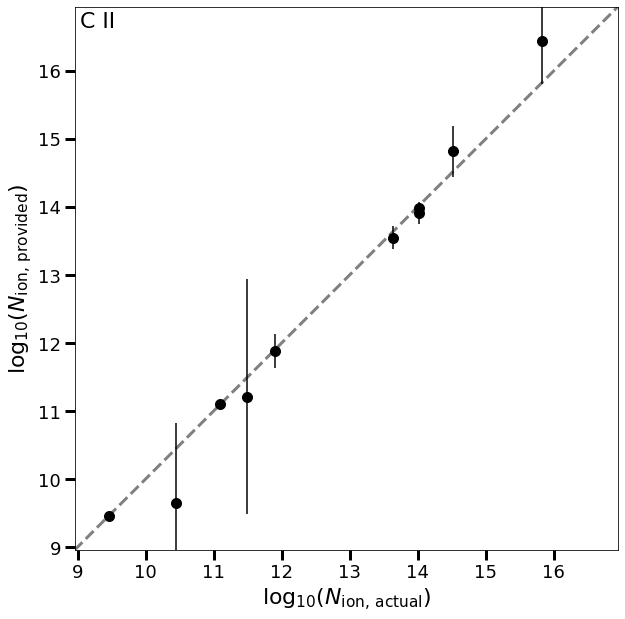

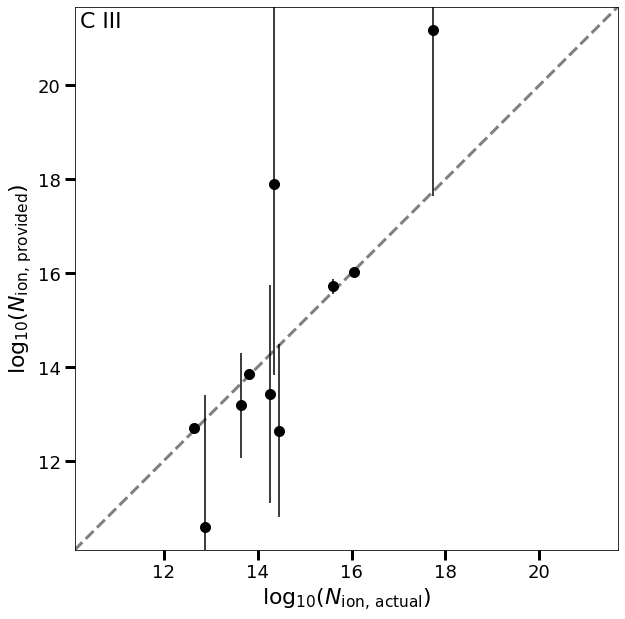

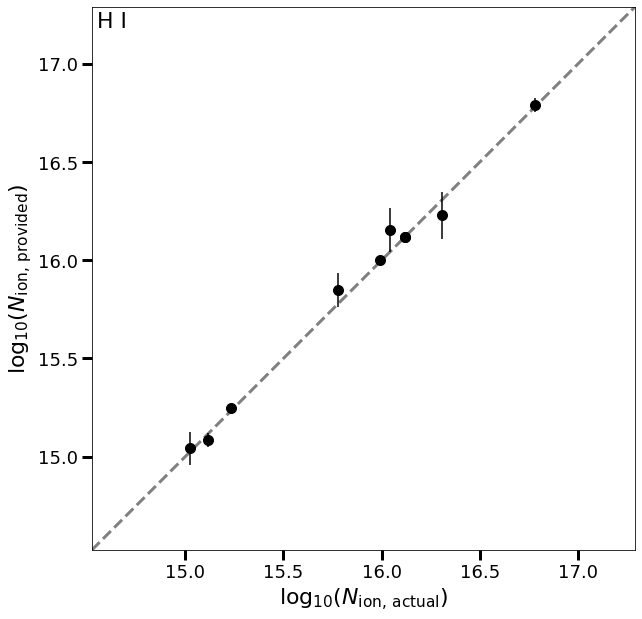

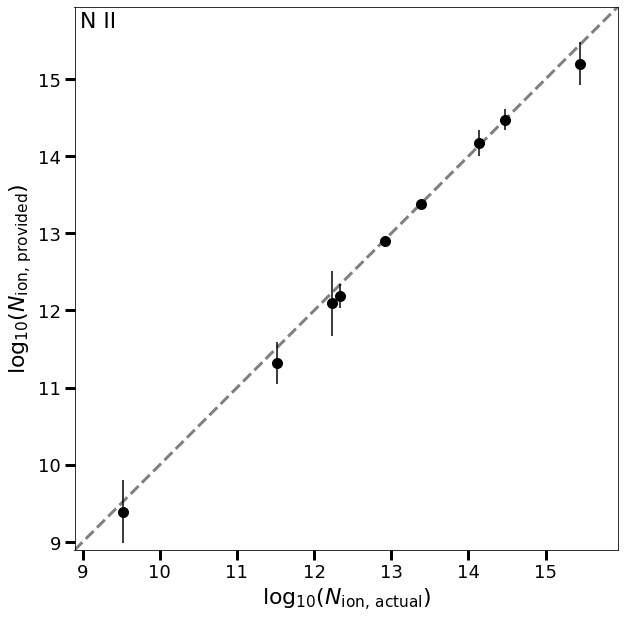

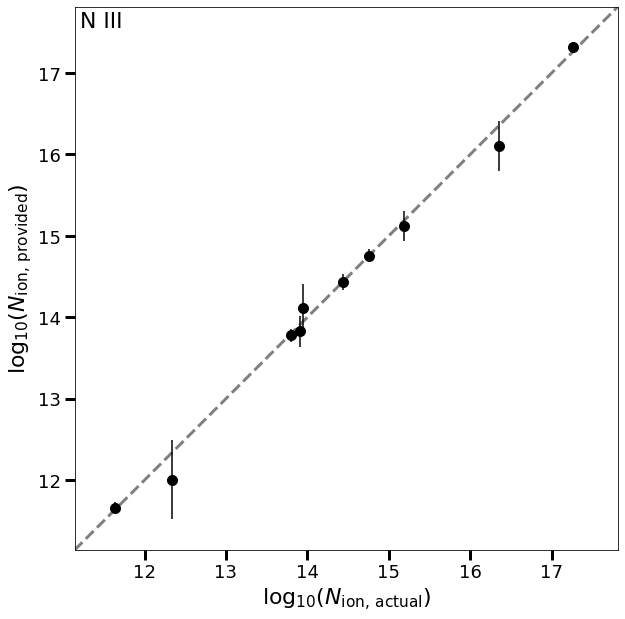

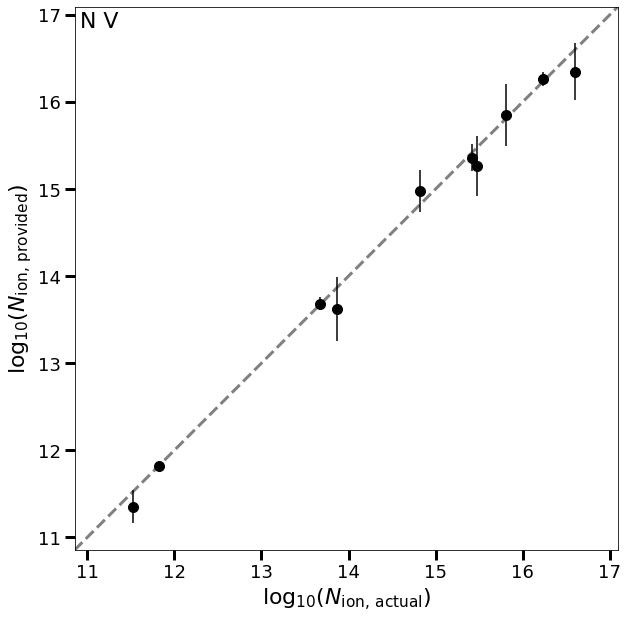

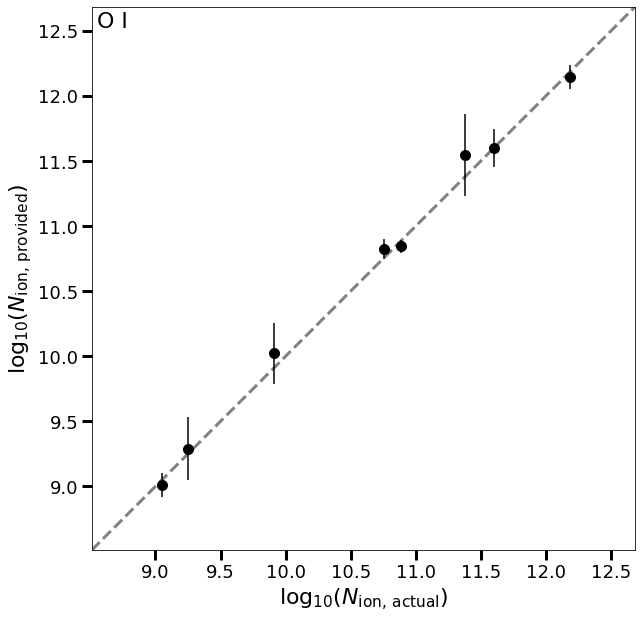

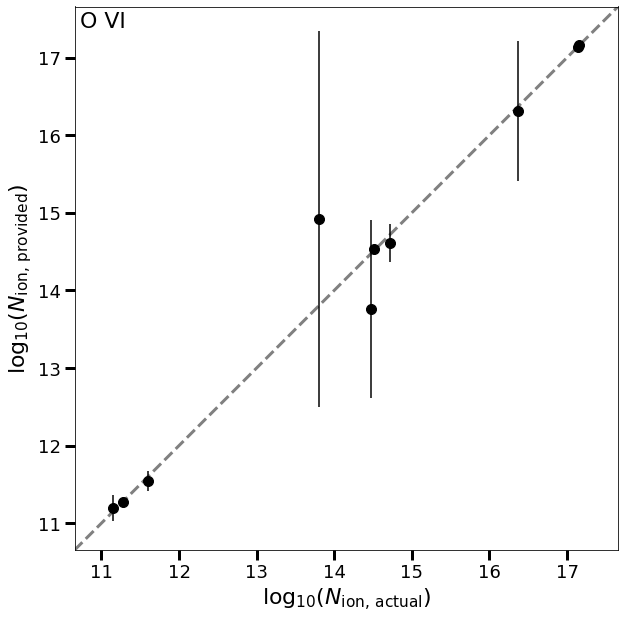

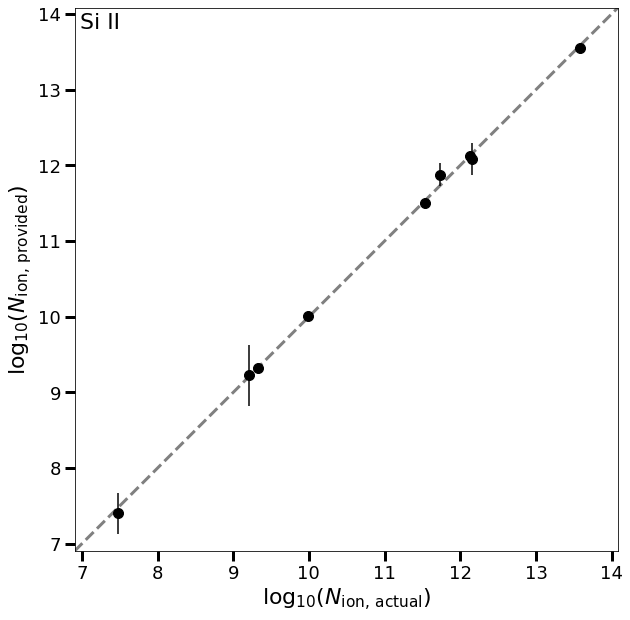

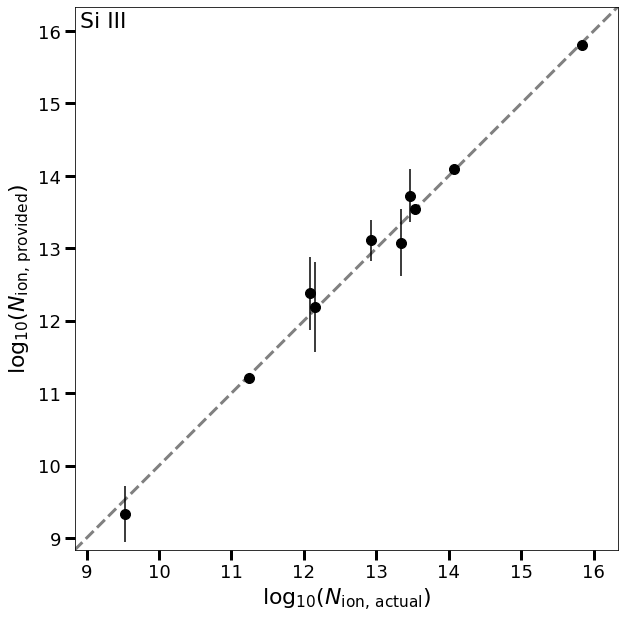

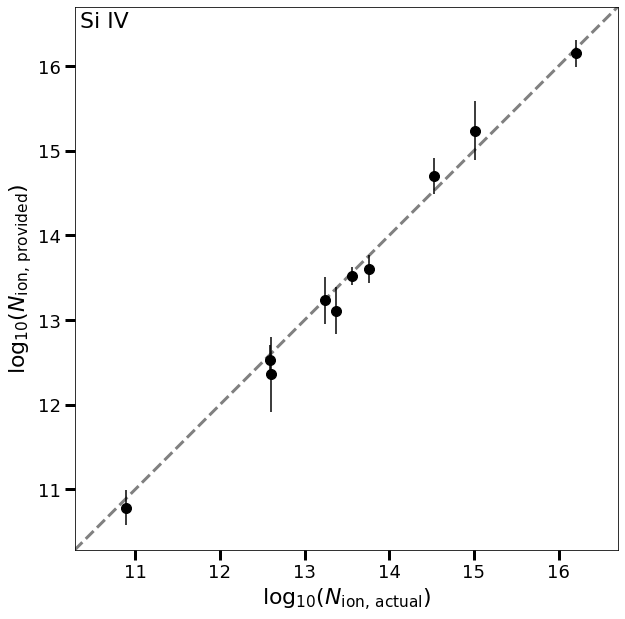

In [18]:

for ion in ions:
    fig = plt.figure( figsize=(10,10), facecolor='w' )
    ax = plt.gca()

    xs = np.log10( actual[ion] )
    ys = provided[ion]['logN']
    eys = provided[ion]['elogN']

    ax.errorbar(
        xs,
        ys,
        yerr = eys,
        marker = 'o',
        markersize = 10,
        color = 'k',
        linestyle = 'none',
    )

    bounds = [
        min( np.nanmin( xs[np.isfinite(xs)] ), np.nanmin( ys[np.isfinite(ys)] ) ) - 0.5,
        max( np.nanmax( xs[np.isfinite(xs)] ), np.nanmax( ys[np.isfinite(ys)] ) ) + 0.5,
    ]
    ax.plot(
        bounds,
        bounds,
        color = '0.5',
        linestyle = '--',
        linewidth = 3,
        zorder = -10,
    )
    
    ax.annotate(
        s = ion,
        xy = ( 0, 1 ),
        xycoords = 'axes fraction',
        xytext = ( 5, -5 ),
        textcoords = 'offset points',
        fontsize = 22,
        ha = 'left',
        va = 'top',
    )
    
    ax.tick_params( length=10, width=3, labelsize=18 )

    ax.set_xlabel( r'$\log_{10}( N_{\rm ion,\,actual} )$', fontsize=22, )
    ax.set_ylabel( r'$\log_{10}( N_{\rm ion,\,provided} )$', fontsize=22, )

    ax.set_xlim( bounds )
    ax.set_ylim( bounds )

    ax.set_aspect( 'equal' )